<a href="https://colab.research.google.com/github/Anuj-1996/Correlation_Indian_Equities/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#NSE-500 listed companies ticker
#use this ticker symbols for analysis
#I will recommend to use only 10-15 stocks, because correlation matrix will be small and difficult to visualise.
'3MINDIA.NS','ABB.NS','POWERINDIA.NS','ACC.NS','AIAENG.NS','APLAPOLLO.NS','AUBANK.NS','AARTIDRUGS.NS','AARTIIND.NS','AAVAS.NS','ABBOTINDIA.NS','ADANIENT.NS',
'ADANIGREEN.NS','ADANIPORTS.NS','ATGL.NS','ADANITRANS.NS','ABCAPITAL.NS','ABFRL.NS','ADVENZYMES.NS','AEGISCHEM.NS','AFFLE.NS','AJANTPHARM.NS','AKZOINDIA.NS',
'ALEMBICLTD.NS','APLLTD.NS','ALKEM.NS','ALKYLAMINE.NS','ALOKINDS.NS','AMARAJABAT.NS','AMBER.NS','AMBUJACEM.NS','ANGELBRKG.NS','APOLLOHOSP.NS','APOLLOTYRE.NS',
'ASAHIINDIA.NS','ASHOKLEY.NS','ASHOKA.NS','ASIANPAINT.NS','ASTERDM.NS','ASTRAZEN.NS','ASTRAL.NS','ATUL.NS','AUROPHARMA.NS','AVANTIFEED.NS','DMART.NS','AXISBANK.NS',
'BASF.NS','BEML.NS','BSE.NS','BAJAJ-AUTO.NS','BAJAJCON.NS','BAJAJELEC.NS','BAJFINANCE.NS','BAJAJFINSV.NS','BAJAJHLDNG.NS','BALAMINES.NS','BALKRISIND.NS','BALMLAWRIE.NS',
'BALRAMCHIN.NS','BANDHANBNK.NS','BANKBARODA.NS','BANKINDIA.NS','MAHABANK.NS','BATAINDIA.NS','BAYERCROP.NS','BERGEPAINT.NS','BDL.NS','BEL.NS','BHARATFORG.NS','BHEL.NS',
'BPCL.NS','BHARATRAS.NS','BHARTIARTL.NS','BIOCON.NS','BIRLACORPN.NS','BSOFT.NS','BLISSGVS.NS','BLUEDART.NS','BLUESTARCO.NS','BBTC.NS','BOSCHLTD.NS','BRIGADE.NS',
'BRITANNIA.NS','BURGERKING.NS','CCL.NS','CESC.NS','CRISIL.NS','CSBBANK.NS','CADILAHC.NS','CANFINHOME.NS','CANBK.NS','CAPLIPOINT.NS','CGCL.NS','CARBORUNIV.NS',
'CASTROLIND.NS','CEATLTD.NS','CENTRALBK.NS','CDSL.NS','CENTURYPLY.NS','CENTURYTEX.NS','CERA.NS','CHALET.NS','CHAMBLFERT.NS','CHOLAHLDNG.NS','CHOLAFIN.NS','CIPLA.NS',
'CUB.NS','COALINDIA.NS','COCHINSHIP.NS','COFORGE.NS','COLPAL.NS','CAMS.NS','CONCOR.NS','COROMANDEL.NS','CREDITACC.NS','CROMPTON.NS','CUMMINSIND.NS','CYIENT.NS','DCBBANK.NS','DCMSHRIRAM.NS','DLF.NS','DABUR.NS','DALBHARAT.NS','DEEPAKNTR.NS','DELTACORP.NS','DHANI.NS','DHANUKA.NS','DBL.NS','DISHTV.NS','DCAL.NS','DIVISLAB.NS','DIXON.NS','LALPATHLAB.NS','DRREDDY.NS','EIDPARRY.NS','EIHOTEL.NS','EPL.NS','EDELWEISS.NS','EICHERMOT.NS','ELGIEQUIP.NS','EMAMILTD.NS','ENDURANCE.NS','ENGINERSIN.NS','EQUITAS.NS','ERIS.NS','ESCORTS.NS','EXIDEIND.NS','FDC.NS','FEDERALBNK.NS','FINEORG.NS','FINCABLES.NS','FINPIPE.NS','FSL.NS','FORTIS.NS','FCONSUMER.NS','FRETAIL.NS','GAIL.NS','GEPIL.NS','GMMPFAUDLR.NS','GMRINFRA.NS','GALAXYSURF.NS','GRSE.NS','GARFIBRES.NS','GICRE.NS','GILLETTE.NS','GLAXO.NS','GLENMARK.NS','GODFRYPHLP.NS','GODREJAGRO.NS','GODREJCP.NS','GODREJIND.NS','GODREJPROP.NS','GRANULES.NS','GRAPHITE.NS','GRASIM.NS','GESHIP.NS','GREAVESCOT.NS','GRINDWELL.NS','GUJALKALI.NS','GAEL.NS','FLUOROCHEM.NS','GUJGASLTD.NS','GNFC.NS','GPPL.NS','GSFC.NS','GSPL.NS','GULFOILLUB.NS','HEG.NS','HCLTECH.NS','HDFCAMC.NS','HDFCBANK.NS','HDFCLIFE.NS','HFCL.NS','HAPPSTMNDS.NS','HATSUN.NS','HAVELLS.NS','HEIDELBERG.NS','HEMIPROP.NS','HEROMOTOCO.NS','HSCL.NS','HINDALCO.NS','HAL.NS','HINDCOPPER.NS','HINDPETRO.NS','HINDUNILVR.NS','HINDZINC.NS','HONAUT.NS','HUDCO.NS','HDFC.NS','HUHTAMAKI.NS','ICICIBANK.NS','ICICIGI.NS','ICICIPRULI.NS','ISEC.NS','IDBI.NS','IDFCFIRSTB.NS','IDFC.NS','IFBIND.NS','IIFL.NS','IIFLWAM.NS','IOLCP.NS','IRB.NS','IRCON.NS','ITC.NS','ITI.NS','INDIACEM.NS','IBULHSGFIN.NS','IBREALEST.NS','INDIAMART.NS','INDIANB.NS','IEX.NS','INDHOTEL.NS','IOC.NS','IOB.NS','IRCTC.NS','ICIL.NS','INDOCO.NS','IGL.NS','INDUSTOWER.NS','INDUSINDBK.NS','INFIBEAM.NS','NAUKRI.NS','INFY.NS','INGERRAND.NS','INOXLEISUR.NS','INTELLECT.NS','INDIGO.NS','IPCALAB.NS','JBCHEPHARM.NS','JKCEMENT.NS','JKLAKSHMI.NS','JKPAPER.NS','JKTYRE.NS','JMFINANCIL.NS','JSWENERGY.NS','JSWSTEEL.NS','JTEKTINDIA.NS','JAMNAAUTO.NS','JINDALSAW.NS','JSLHISAR.NS','JSL.NS','JINDALSTEL.NS','JCHAC.NS','JUBLFOOD.NS','JUSTDIAL.NS','JYOTHYLAB.NS','KPRMILL.NS','KEI.NS','KNRCON.NS','KPITTECH.NS','KRBL.NS','KSB.NS','KAJARIACER.NS','KALPATPOWR.NS','KANSAINER.NS','KARURVYSYA.NS','KSCL.NS','KEC.NS','KOTAKBANK.NS','L&TFH.NS','LTTS.NS','LICHSGFIN.NS','LAOPALA.NS','LAXMIMACH.NS','LTI.NS','LT.NS','LAURUSLABS.NS','LEMONTREE.NS','LINDEINDIA.NS','LUPIN.NS','LUXIND.NS','MASFIN.NS','MMTC.NS','MOIL.NS','MRF.NS','MGL.NS','MAHSCOOTER.NS','MAHSEAMLES.NS','M&MFIN.NS','M&M.NS','MAHINDCIE.NS','MHRIL.NS','MAHLOG.NS','MANAPPURAM.NS','MRPL.NS','MARICO.NS','MARUTI.NS','MFSL.NS','MAXHEALTH.NS','MAZDOCK.NS','METROPOLIS.NS','MINDTREE.NS','MINDACORP.NS','MINDAIND.NS','MIDHANI.NS','MOTHERSUMI.NS','MOTILALOFS.NS','MPHASIS.NS','MCX.NS','MUTHOOTFIN.NS','NATCOPHARM.NS','NBCC.NS','NCC.NS','NESCO.NS','NHPC.NS','NLCINDIA.NS','NMDC.NS','NOCIL.NS','NTPC.NS','NH.NS','NATIONALUM.NS','NFL.NS','NAVINFLUOR.NS','NESTLEIND.NS','NETWORK18.NS','NILKAMAL.NS','NAM-INDIA.NS','OBEROIRLTY.NS','ONGC.NS','OIL.NS','OFSS.NS','ORIENTELEC.NS','ORIENTREF.NS','PIIND.NS','PNBHOUSING.NS','PNCINFRA.NS','PVR.NS','PAGEIND.NS','PERSISTENT.NS','PETRONET.NS','PFIZER.NS','PHILIPCARB.NS','PHOENIXLTD.NS','PIDILITIND.NS','PEL.NS','POLYMED.NS','POLYCAB.NS','POLYPLEX.NS','PFC.NS','POWERGRID.NS','PRESTIGE.NS','PRINCEPIPE.NS','PRSMJOHNSN.NS','PGHL.NS','PGHH.NS','PNB.NS','QUESS.NS','RBLBANK.NS','RECLTD.NS','RITES.NS','RADICO.NS','RVNL.NS','RAIN.NS','RAJESHEXPO.NS','RALLIS.NS','RCF.NS','RATNAMANI.NS','RAYMOND.NS','REDINGTON.NS','RELAXO.NS','RELIANCE.NS','RESPONIND.NS','ROSSARI.NS','ROUTE.NS','SBICARD.NS','SBILIFE.NS','SIS.NS','SJVN.NS','SKFINDIA.NS','SRF.NS','SANOFI.NS','SCHAEFFLER.NS','SCHNEIDER.NS','SEQUENT.NS','SHARDACROP.NS','SFL.NS','SHILPAMED.NS','SCI.NS','SHOPERSTOP.NS','SHREECEM.NS','SHRIRAMCIT.NS','SRTRANSFIN.NS','SIEMENS.NS','SOBHA.NS','SOLARINDS.NS','SOLARA.NS','SONATSOFTW.NS','SPANDANA.NS','SPICEJET.NS','STARCEMENT.NS','SBIN.NS','SAIL.NS','SWSOLAR.NS','STLTECH.NS','STAR.NS','SUDARSCHEM.NS','SUMICHEM.NS','SPARC.NS','SUNPHARMA.NS','SUNTV.NS','SUNCLAYLTD.NS','SUNDARMFIN.NS','SUNDRMFAST.NS','SUNTECK.NS','SUPRAJIT.NS','SUPREMEIND.NS','SUPPETRO.NS','SUVENPHAR.NS','SUZLON.NS','SWANENERGY.NS','SYMPHONY.NS','SYNGENE.NS','TCIEXP.NS','TCNSBRANDS.NS','TTKPRESTIG.NS','TV18BRDCST.NS','TVSMOTOR.NS','TANLA.NS','TASTYBITE.NS','TATACHEM.NS','TATACOFFEE.NS','TATACOMM.NS','TCS.NS','TATACONSUM.NS','TATAELXSI.NS','TATAINVEST.NS','TATAMTRDVR.NS','TATAMOTORS.NS','TATAPOWER.NS','TATASTEEL.NS','TEAMLEASE.NS','TECHM.NS','NIACL.NS','RAMCOCEM.NS','THERMAX.NS','THYROCARE.NS','TIMKEN.NS','TITAN.NS','TORNTPHARM.NS','TORNTPOWER.NS','TRENT.NS','TRIDENT.NS','TRITURBINE.NS','TIINDIA.NS','UCOBANK.NS','UFLEX.NS','UPL.NS','UTIAMC.NS','UJJIVAN.NS','UJJIVANSFB.NS','ULTRACEMCO.NS','UNIONBANK.NS','UBL.NS','MCDOWELL-N.NS','VGUARD.NS','VMART.NS','VIPIND.NS','VSTIND.NS','VAIBHAVGBL.NS','VAKRANGEE.NS','VALIANTORG.NS','VTL.NS','VARROC.NS','VBL.NS','VEDL.NS','VENKEYS.NS','VINATIORGA.NS','IDEA.NS','VOLTAS.NS','WABCOINDIA.NS','WELCORP.NS','WELSPUNIND.NS','WESTLIFE.NS','WHIRLPOOL.NS','WIPRO.NS','WOCKPHARMA.NS','YESBANK.NS','ZEEL.NS','ZENSARTECH.NS','ZYDUSWELL.NS','ECLERX.NS'

Enter date start date in: yy-mm-dd
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

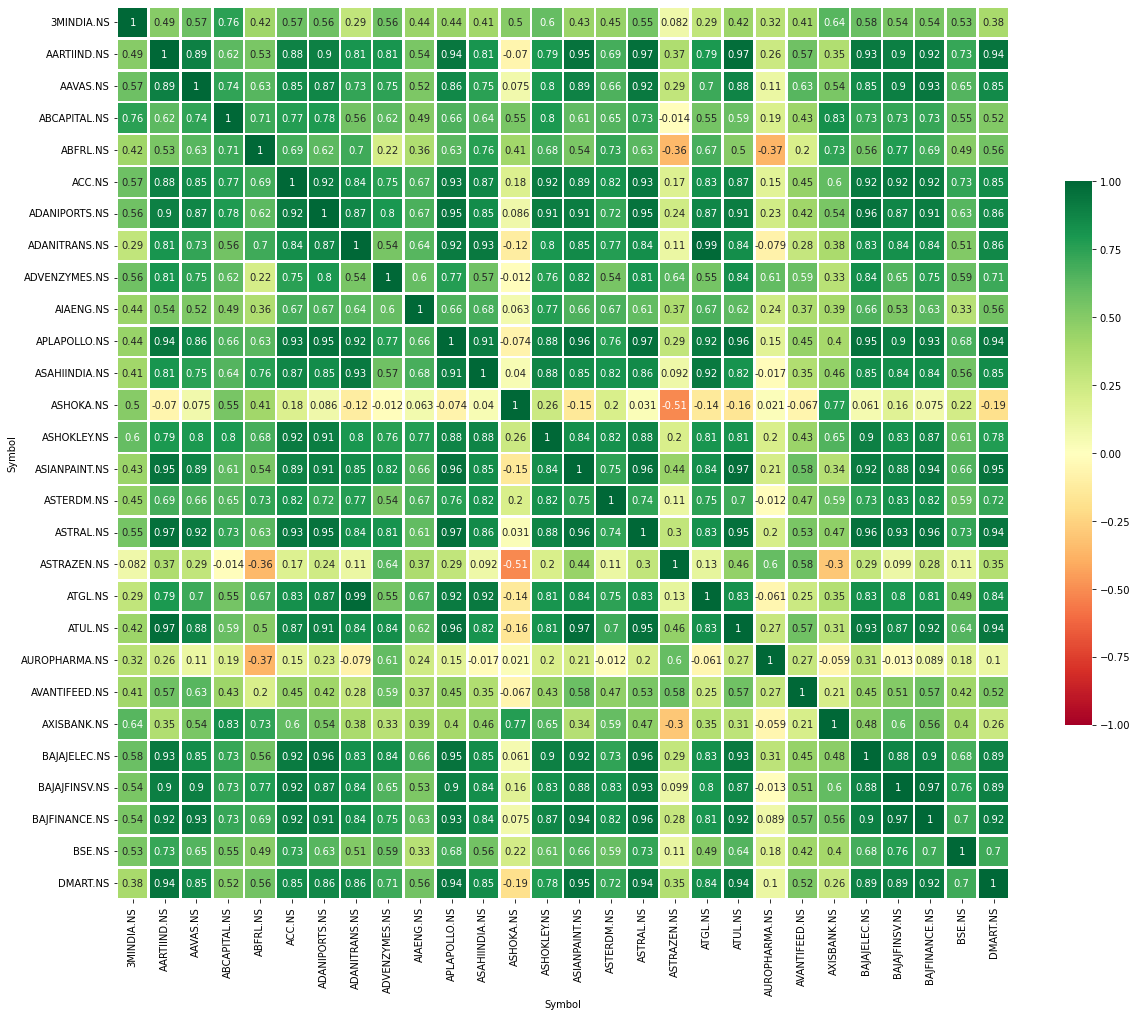

In [78]:
import numpy as np
import pandas as pd
 #used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
 #to visualize the results
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

#select start date for correlation window as well as list of tickers

print('Enter date start date in: yy-mm-dd')
start= '2019-01-01'
today= datetime.today().strftime('%Y-%m-%d')
symbols_list = ['3MINDIA.NS','ACC.NS','AIAENG.NS','APLAPOLLO.NS','AARTIIND.NS','AAVAS.NS','ADANIPORTS.NS',
                'ATGL.NS','ADANITRANS.NS','ABCAPITAL.NS','ABFRL.NS','ADVENZYMES.NS',
                'ASAHIINDIA.NS','ASHOKLEY.NS','ASHOKA.NS','ASIANPAINT.NS','ASTERDM.NS',
                'ASTRAZEN.NS','ASTRAL.NS','ATUL.NS','AUROPHARMA.NS','AVANTIFEED.NS','DMART.NS',
                'AXISBANK.NS','BSE.NS','BAJAJELEC.NS','BAJFINANCE.NS','BAJAJFINSV.NS']
#array to store prices
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = pdr.get_data_yahoo(ticker, data_source='yahoo', start= start, end= today)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)

# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Close').reset_index()


df_pivot.head()
dp = pd.DataFrame(df_pivot)
corrM=dp.corr()

import matplotlib.pyplot as plt
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 20)

#take the bottom triangle since it repeats itself
mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = 0
 #generate plot
seaborn.heatmap(corrM, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask,center=0, square=True, linewidths=1.5, cbar_kws={"shrink": .5}, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()



# **Pair Trading Stocks (Correlation coeff > 0.8)**

In [84]:
matrix = df_pivot.corr()
#pairs in between 0.8 to 1 i.e. least correlated
pairs = matrix[(matrix >= 0.8) ].drop_duplicates()

#using drop_duplicate() to remove duplicates
#drop na if any null value
corr_pairs = pairs.unstack().dropna()

#using quicksort
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#to print all the list
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(sorted_pairs)

Symbol         Symbol       
ADVENZYMES.NS  ADANIPORTS.NS    0.800596
ADANITRANS.NS  ASHOKLEY.NS      0.803278
               AARTIIND.NS      0.806685
ASHOKLEY.NS    ATGL.NS          0.806840
ASAHIINDIA.NS  AARTIIND.NS      0.807207
BAJFINANCE.NS  ATGL.NS          0.810816
ADVENZYMES.NS  AARTIIND.NS      0.811590
ASHOKLEY.NS    ATUL.NS          0.813713
ADVENZYMES.NS  ASTRAL.NS        0.814448
ASTERDM.NS     ACC.NS           0.815166
ASAHIINDIA.NS  ASTERDM.NS       0.818211
ADVENZYMES.NS  ASIANPAINT.NS    0.818725
ASAHIINDIA.NS  ATUL.NS          0.819564
ASTERDM.NS     ASHOKLEY.NS      0.820658
BAJFINANCE.NS  ASTERDM.NS       0.821673
BAJAJFINSV.NS  ASTERDM.NS       0.826510
BAJAJELEC.NS   ATGL.NS          0.828675
ABCAPITAL.NS   AXISBANK.NS      0.829091
ASTRAL.NS      ATGL.NS          0.829148
ATUL.NS        ATGL.NS          0.831555
ACC.NS         ATGL.NS          0.832629
BAJAJFINSV.NS  ASHOKLEY.NS      0.834434
ADANITRANS.NS  BAJAJELEC.NS     0.834842
               BAJAJFINSV.NS

# **Stocks which are least correlated or <0.2** 

In [87]:
#pairs in between 0.2 to 0 i.e. least correlated
pairs = matrix[(matrix <= 0.2) & (matrix >= 0) ]

#using drop_duplicate() to remove duplicates
#drop na if any null value
corr_pairs = pairs.unstack().dropna().drop_duplicates()

#using quicksort
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

#to print all the list
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(sorted_pairs)

Symbol         Symbol       
ASHOKA.NS      AUROPHARMA.NS    0.021322
               ASTRAL.NS        0.030665
ASAHIINDIA.NS  ASHOKA.NS        0.039836
ASHOKA.NS      BAJAJELEC.NS     0.060519
AIAENG.NS      ASHOKA.NS        0.063250
ASHOKA.NS      BAJFINANCE.NS    0.075194
AAVAS.NS       ASHOKA.NS        0.075341
3MINDIA.NS     ASTRAZEN.NS      0.082443
ADANIPORTS.NS  ASHOKA.NS        0.085665
AUROPHARMA.NS  BAJFINANCE.NS    0.088952
ASAHIINDIA.NS  ASTRAZEN.NS      0.091938
ASTRAZEN.NS    BAJAJFINSV.NS    0.099377
AUROPHARMA.NS  DMART.NS         0.101754
ASTERDM.NS     ASTRAZEN.NS      0.105153
ADANITRANS.NS  ASTRAZEN.NS      0.106615
AAVAS.NS       AUROPHARMA.NS    0.108916
ASTRAZEN.NS    BSE.NS           0.113960
               ATGL.NS          0.125569
APLAPOLLO.NS   AUROPHARMA.NS    0.148538
ACC.NS         AUROPHARMA.NS    0.151734
ASHOKA.NS      BAJAJFINSV.NS    0.163316
ACC.NS         ASTRAZEN.NS      0.172162
AUROPHARMA.NS  BSE.NS           0.178783
ACC.NS         ASHOKA.NS    